In [ ]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as mat
import pandas as pd
import io
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn import svm

Import Data and Libraries ^^

In [ ]:
data = pd.read_csv("spotify-2023.csv", encoding='latin1')
data = data.dropna()
stringkey = data['key'].astype(str) #Convert column from type object to string
print(stringkey)

0       B
1      C#
2       F
3       A
4       A
       ..
948     A
949    F#
950    C#
951    C#
952     E
Name: key, Length: 817, dtype: object


Visualizing Data, Exploring the dataset

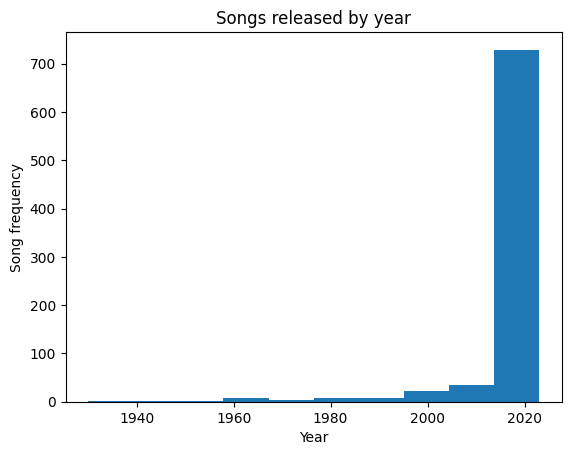

In [ ]:
mat.hist(data['released_year'])
mat.title("Songs released by year")
mat.xlabel("Year")
mat.ylabel("Song frequency")
mat.show()

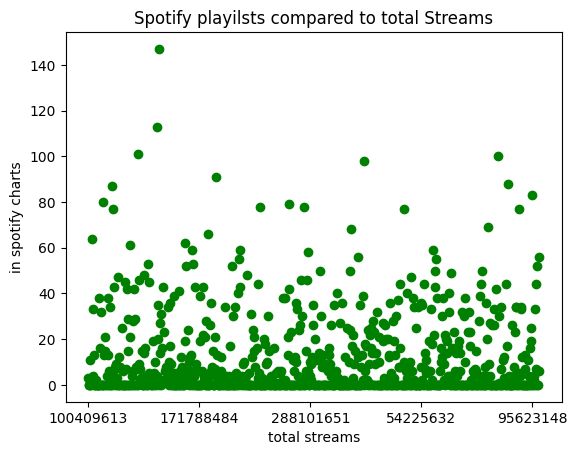

In [ ]:
from matplotlib.pyplot import locator_params
from matplotlib.pyplot import xlim
# Remove non-integer values from each numeric column
#data = data[data['streams'] != data['streams'].max()] #removes incorrect data type
datasorted = data.sort_values(by=['streams'])
ax = mat.gca()
ax.set_xticks(np.arange(0,816, 200))
mat.scatter(datasorted['streams'], datasorted['in_spotify_charts'], color = 'green')
#ax.xaxis.set_tick_params(labelbottom=False)
#mat.locator_params(axis='both', nbins=10)
mat.title('Spotify playilsts compared to total Streams')
mat.ylabel('in spotify charts')
mat.xlabel('total streams')
mat.show()

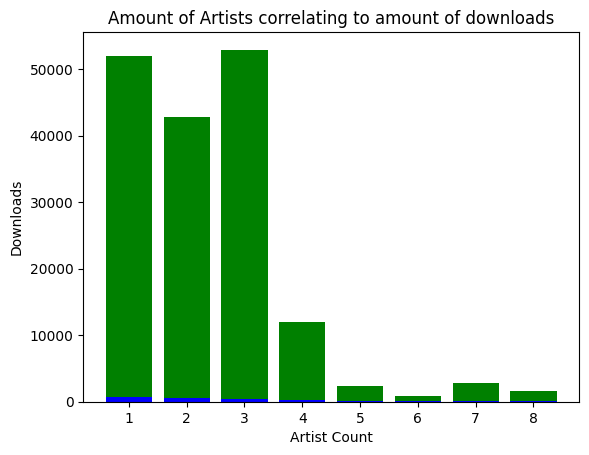

In [ ]:
mat.bar(data['artist_count'], data['in_spotify_playlists'], color = 'green')
mat.bar(data['artist_count'], data['in_apple_playlists'], color = 'blue')
#mat.bar(data['artist_count'], data['in_deezer_playlists'], color = 'purple')
mat.title("Amount of Artists correlating to amount of downloads")
mat.xlabel("Artist Count")
mat.ylabel("Downloads")
mat.show()

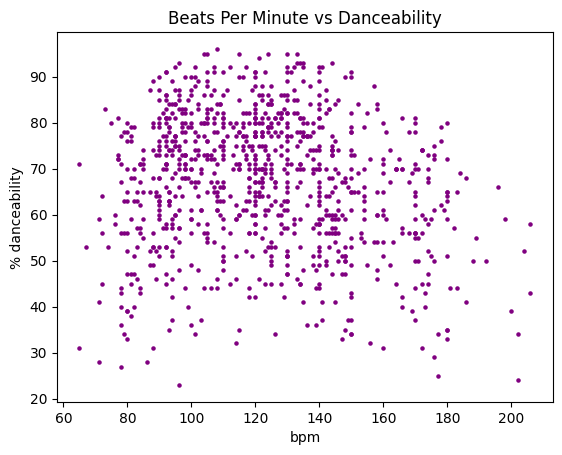

In [ ]:
mat.scatter(data['bpm'], data['danceability_%'],s=5, color = 'purple')
mat.title("Beats Per Minute vs Danceability")
mat.xlabel("bpm")
mat.ylabel("% danceability")
mat.show()

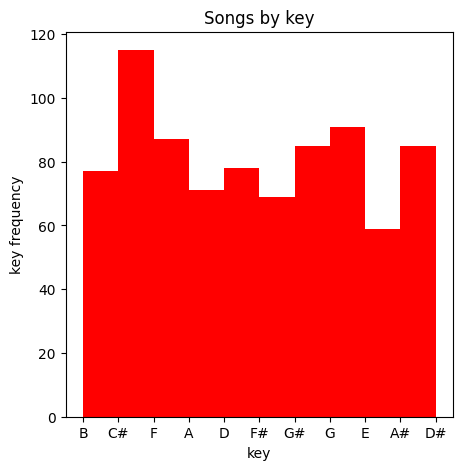

In [ ]:
mat.hist(stringkey, color = 'red')
mat.title("Songs by key")
mat.xlabel("key")
mat.ylabel("key frequency")
mat.show()

Text(0.5, 1.0, 'Correlation between Variables in Spotify Data')

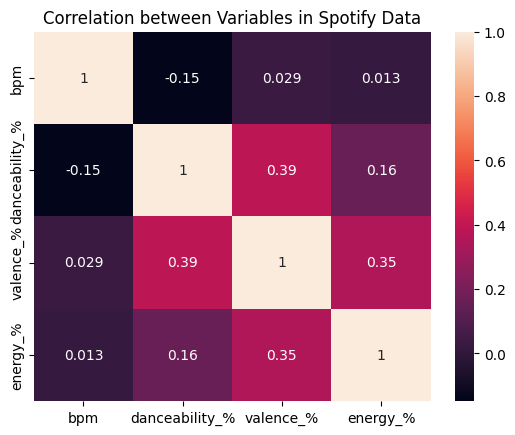

In [ ]:
#correlation matrix
floatsinData = data[['bpm', 'danceability_%', 'valence_%', 'energy_%']]
corr = floatsinData.corr()
sns.heatmap(corr, annot=True, fmt='.2g')
mat.title('Correlation between Variables in Spotify Data')

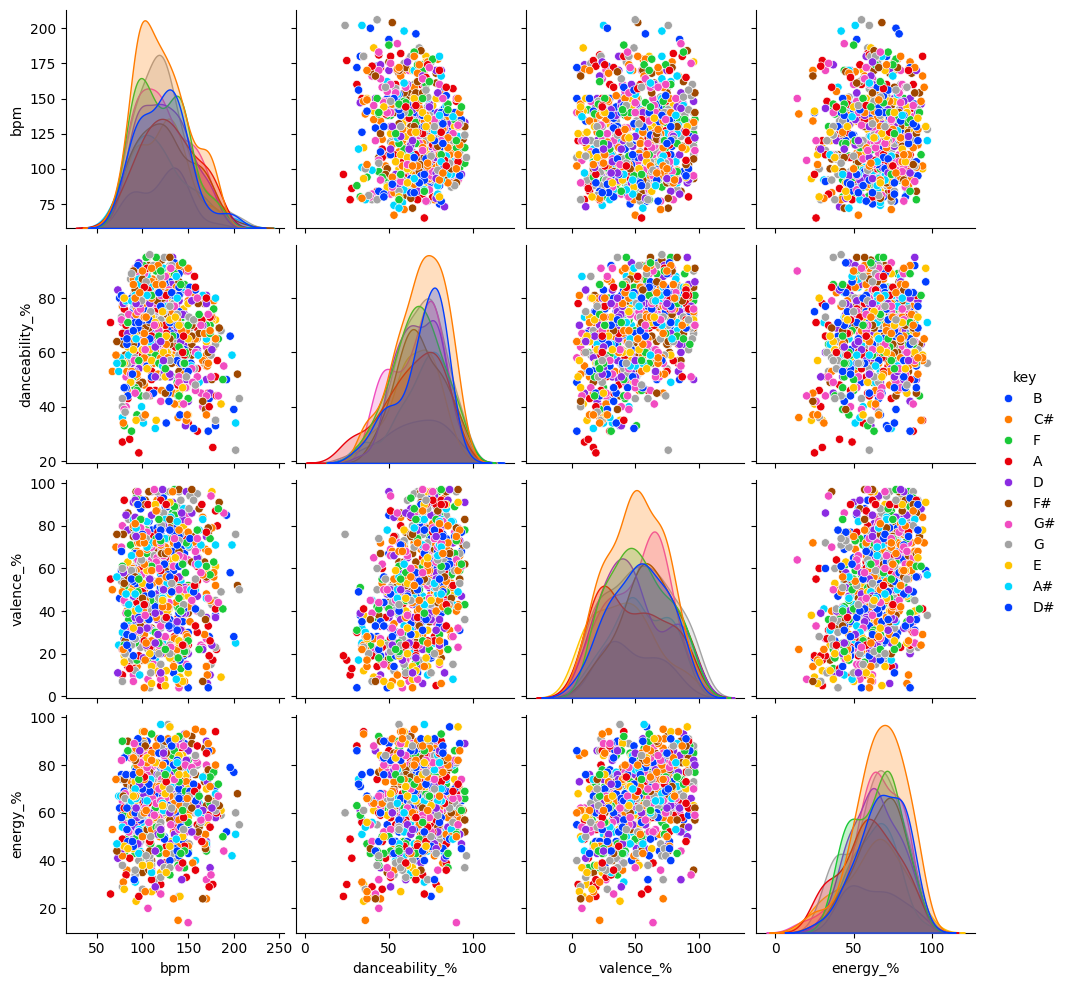

In [ ]:
X = data[['bpm','danceability_%', 'valence_%', 'energy_%', 'key']]
sns.pairplot(X,palette="bright", hue = 'key') #plots pairwise relationships in dataset
mat.show()

**KNN Model**

In [ ]:
from sklearn import metrics
X = data[['bpm','danceability_%', 'valence_%', 'energy_%']]# 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]#,  adding more features makes the model less accurate
X_train, X_test, y_train, y_test = train_test_split(X, stringkey, test_size=0.2,random_state=40)
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)
print(y_train.size)
y_predict = knn.predict(X_test)
scr=knn.score(X_test, y_test)
print("Score for your model is ", scr)
print(knn.predict([[125, 80, 89, 83]])) #predicts key based on data
print(metrics.classification_report(y_test, y_predict)) #returns accuracy report
print(X_test.size)

653
Score for your model is  0.14634146341463414
['B']
              precision    recall  f1-score   support

           A       0.06      0.12      0.08        16
          A#       0.14      0.30      0.19        10
           B       0.19      0.29      0.23        14
          C#       0.13      0.38      0.19        13
           D       0.40      0.09      0.14        23
          D#       0.20      0.20      0.20         5
           E       0.29      0.14      0.19        14
           F       0.12      0.07      0.09        14
          F#       0.00      0.00      0.00        19
           G       0.17      0.12      0.14        17
          G#       0.22      0.11      0.14        19

    accuracy                           0.15       164
   macro avg       0.17      0.17      0.15       164
weighted avg       0.18      0.15      0.14       164

656


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


([<matplotlib.axis.XTick at 0x7d1a5cb6cca0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

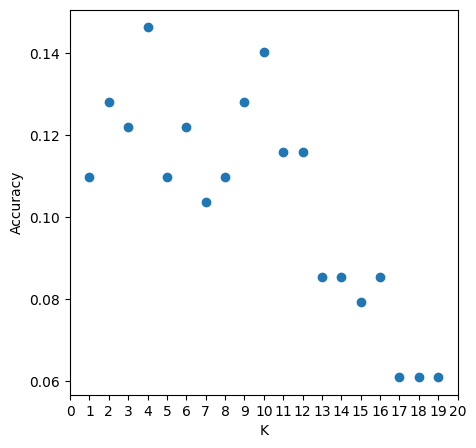

In [ ]:
k_range = range(1,20) #Function to determine best K score for KNN model
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
mat.figure()
mat.xlabel('K')
mat.ylabel('Accuracy')
mat.scatter(k_range, scores)
mat.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

In [ ]:
keysIndex =  [] #Creates new column for 'key' feature that converts strings to ints
for i in y_train: #Function is mainly utilized for graphs
  match i:        #may have to rerun BEFORE EXECUTING SVM VISUALIZATION to remove errors
    case 'A':
      keysIndex.append(0)
    case 'A#':
      keysIndex.append(1)
    case 'B':
      keysIndex.append(2)
    case 'C#':
      keysIndex.append(3)
    case 'D':
      keysIndex.append(4)
    case 'D#':
      keysIndex.append(5)
    case 'E':
      keysIndex.append(6)
    case 'F':
      keysIndex.append(7)
    case 'F#':
      keysIndex.append(8)
    case 'G':
      keysIndex.append(9)
    case 'G#':
      keysIndex.append(10)
print(len(keysIndex))

612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


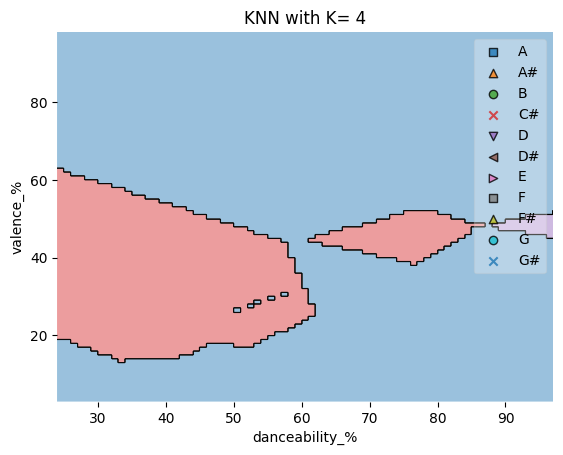

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


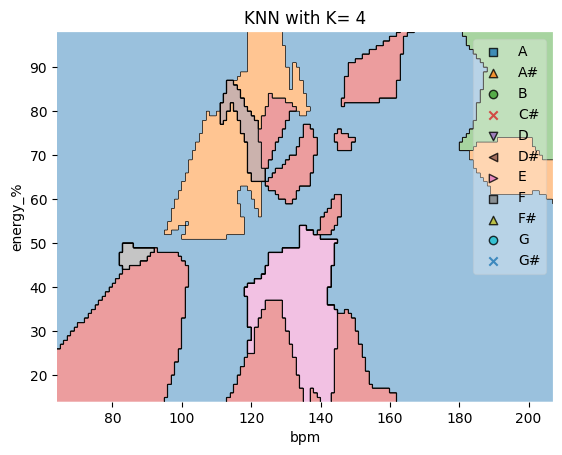

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


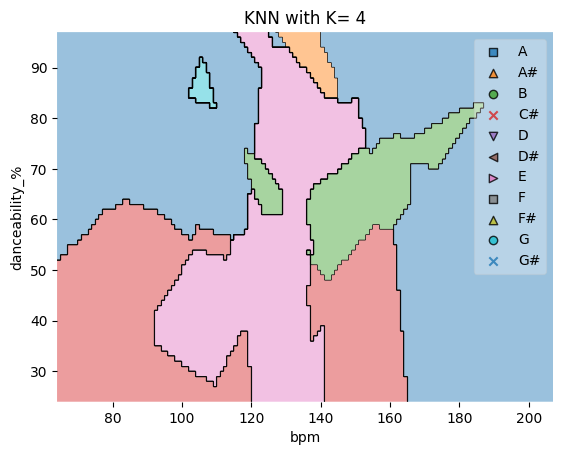

In [ ]:
from mlxtend.plotting import plot_decision_regions
# converting to number values for keys
keysIndex = np.asarray(keysIndex) #function only works if array is np.array
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,keysIndex)
value=1.5
width=0.75
ax = plot_decision_regions(X_train.values, keysIndex, clf=knn, legend=3, feature_index=[1,2],     #will be plotted
              filler_feature_values={0: value, 3:value},  #these features will be ignored
              filler_feature_ranges={0: width, 3: width})
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['A', 'A#', 'B', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'],
           framealpha=0.3, scatterpoints=1)
# Adding axes annotations
#print(y_train_num.min(), " ", y_train_num.max())
mat.xlabel('danceability_%')
mat.ylabel('valence_%')
mat.title('KNN with K= 4') #4 was the best scoring k
mat.show()

ax = plot_decision_regions(X_train.values, keysIndex, clf=knn, legend=2, feature_index=[0,3],     #will be plotted
              filler_feature_values={1: value, 2:value},  #these will be ignored
              filler_feature_ranges={1: width, 2: width})
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['A', 'A#', 'B', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'],
           framealpha=0.3, scatterpoints=1)
mat.xlabel('bpm')
mat.ylabel('energy_%')
mat.title('KNN with K= 4')
mat.show()
ax = plot_decision_regions(X_train.values, keysIndex, clf=knn, legend=2, feature_index=[0,1],    #will be plotted
              filler_feature_values={3: value, 2:value},  #these will be ignored
              filler_feature_ranges={3: width, 2: width})
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['A', 'A#', 'B', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'],
           framealpha=0.3, scatterpoints=1)
mat.xlabel('bpm')
mat.ylabel('danceability_%')
mat.title('KNN with K= 4')
mat.show()
#it's easy to plot the other features against each other, would just have to change filler feature numbers & feature index numbers

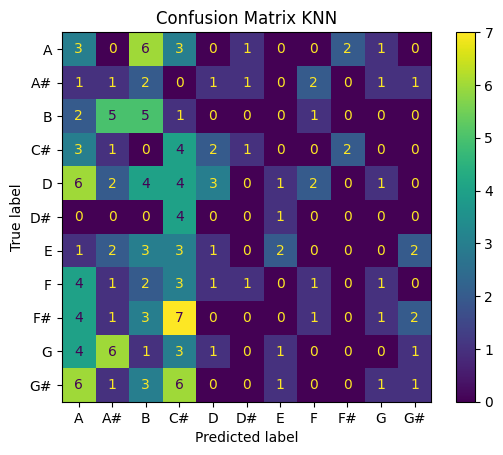

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test,y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['A', 'A#', 'B', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'])
cm_display.plot()
mat.title("Confusion Matrix KNN")
mat.show()

In [ ]:
keysUnfiltered =  [] #Converts string to int, uses original data instead of filtered
for i in stringkey: #keysUnfiltered mainly unused, built for testing
  match i:
    case 'A':
      keysUnfiltered.append(0)
    case 'A#':
      keysUnfiltered.append(1)
    case 'B':
      keysUnfiltered.append(2)
    case 'C#':
      keysUnfiltered.append(3)
    case 'D':
      keysUnfiltered.append(4)
    case 'D#':
      keysUnfiltered.append(5)
    case 'E':
      keysUnfiltered.append(6)
    case 'F':
      keysUnfiltered.append(7)
    case 'F#':
      keysUnfiltered.append(8)
    case 'G':
      keysUnfiltered.append(9)
    case 'G#':
      keysUnfiltered.append(10)
print(len(keysUnfiltered))


817


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
X = data[['bpm','danceability_%', 'valence_%', 'energy_%']]
y = stringkey
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=30)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
# calculating accuracy with confusion matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)
bag = BaggingClassifier(clf, n_estimators=100, max_samples=0.8,
                        random_state=1)

              precision    recall  f1-score   support

           A       0.50      0.07      0.12        15
          A#       0.00      0.00      0.00        17
           B       0.00      0.00      0.00        16
          C#       0.20      0.59      0.30        34
           D       0.12      0.40      0.19        20
          D#       0.00      0.00      0.00         9
           E       0.11      0.07      0.09        14
           F       0.00      0.00      0.00        21
          F#       0.00      0.00      0.00        17
           G       0.15      0.14      0.15        21
          G#       0.10      0.05      0.06        21

    accuracy                           0.17       205
   macro avg       0.11      0.12      0.08       205
weighted avg       0.12      0.17      0.10       205



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


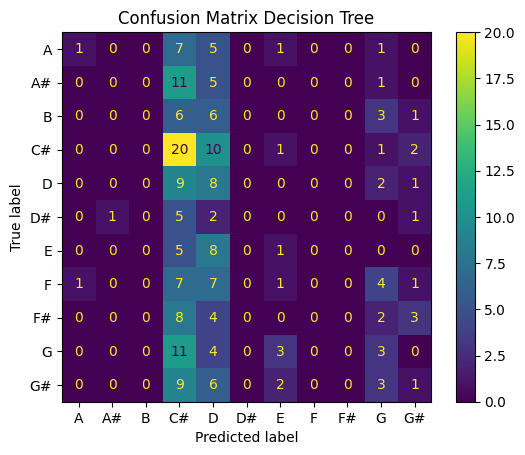

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['A', 'A#', 'B', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'])
cm_display.plot()
mat.title("Confusion Matrix Decision Tree")
mat.show()

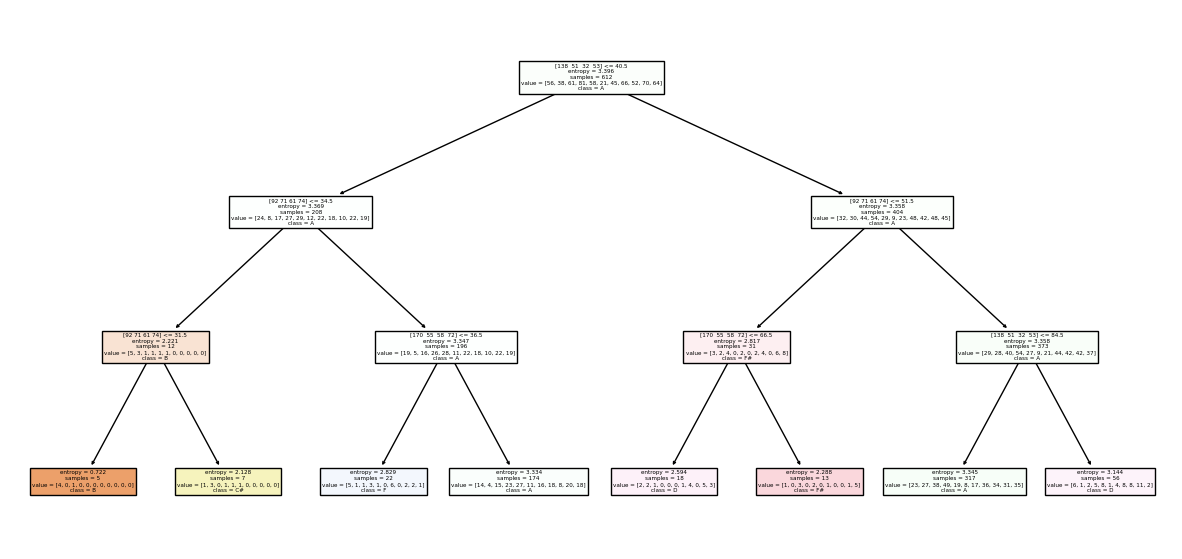

In [ ]:
from sklearn import tree
ig = mat.figure(figsize=(15,7))
_ = tree.plot_tree(clf,
                   feature_names=X.values,
                   class_names=y,
                   filled=True) #Plots decision Tree

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = data[['bpm','danceability_%', 'valence_%', 'energy_%']]
y = stringkey
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

model = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=1, n_jobs=2)
model.fit(X_train, y_train)
ypred = model.predict(X_test)

print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

           A       0.20      0.18      0.19        17
          A#       0.00      0.00      0.00         6
           B       0.12      0.07      0.09        29
          C#       0.18      0.22      0.20        27
           D       0.15      0.12      0.14        24
          D#       0.11      0.17      0.13         6
           E       0.14      0.14      0.14        14
           F       0.33      0.23      0.27        31
          F#       0.12      0.15      0.13        13
           G       0.14      0.15      0.15        20
          G#       0.19      0.22      0.21        18

    accuracy                           0.16       205
   macro avg       0.15      0.15      0.15       205
weighted avg       0.18      0.16      0.17       205



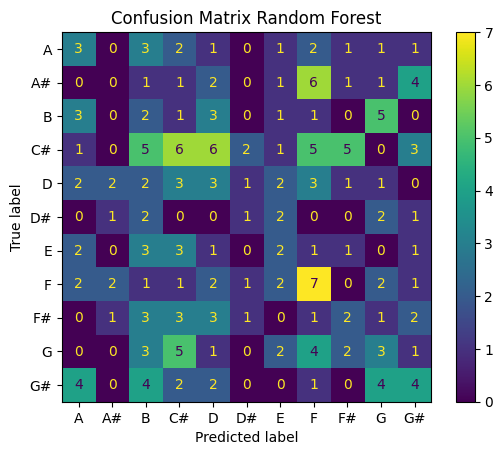

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,ypred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['A', 'A#', 'B', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'])
cm_display.plot()
mat.title("Confusion Matrix Random Forest")
mat.show()

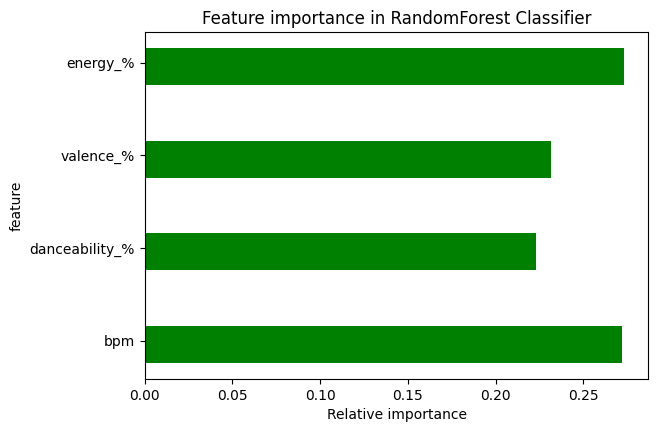

<Figure size 500x500 with 0 Axes>

In [ ]:
model.estimator.fit(X_train, y_train)
ey = model.estimator.feature_importances_
fig, ax = mat.subplots()
width = 0.4 # the width of the bars
ind = np.arange(len(ey)) # the x locations for the groups
ax.barh(ind, ey, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(X, minor=False)
mat.title('Feature importance in RandomForest Classifier')
mat.xlabel('Relative importance')
mat.ylabel('feature')
mat.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True) #this Block graphs which features were the most significant in classifying data

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call
estimator = model.estimators_[4]
X = data[['bpm','danceability_%', 'valence_%', 'energy_%']]
export_graphviz(estimator,
                feature_names= X.columns,
                out_file='tree.dot',
                filled=True,
                rounded=True,
                proportion = False,
                precision = 2)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600']) #exports image of tree to local files (in google cloud)

0

**Bagging Classifier**

In [ ]:
X = data[['bpm','danceability_%', 'valence_%', 'energy_%,']]
y = stringkey
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.22      0.27      0.24        15
          A#       0.00      0.00      0.00        17
           B       0.00      0.00      0.00        16
          C#       0.14      0.47      0.22        34
           D       0.00      0.00      0.00        20
          D#       0.00      0.00      0.00         9
           E       0.50      0.07      0.12        14
           F       0.07      0.05      0.06        21
          F#       0.00      0.00      0.00        17
           G       0.16      0.24      0.19        21
          G#       0.12      0.05      0.07        21

    accuracy                           0.14       205
   macro avg       0.11      0.10      0.08       205
weighted avg       0.11      0.14      0.09       205



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


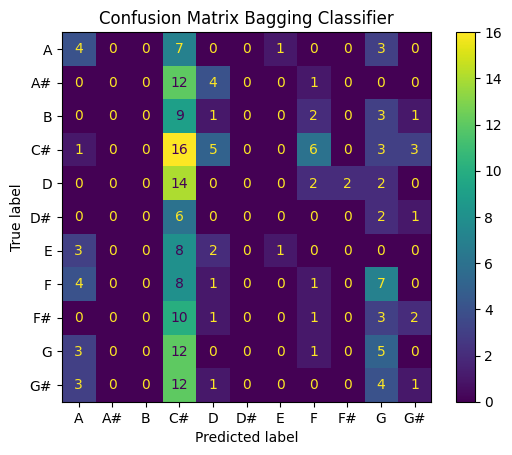

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['A', 'A#', 'B', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'])
cm_display.plot()
mat.title("Confusion Matrix Bagging Classifier")
mat.show()

**Support Vector Machine**

In [ ]:
from sklearn import metrics
X = data[['bpm','danceability_%', 'valence_%', 'energy_%']]
y = stringkey
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)
SVM = svm.SVC(decision_function_shape='ovo')
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           A       0.20      0.21      0.21        14
          A#       0.00      0.00      0.00         0
           B       0.00      0.00      0.00         0
          C#       0.85      0.20      0.32       145
           D       0.05      0.14      0.07         7
          D#       0.00      0.00      0.00         0
           E       0.00      0.00      0.00         0
           F       0.10      0.67      0.17         3
          F#       0.00      0.00      0.00         0
           G       0.24      0.14      0.18        36
          G#       0.00      0.00      0.00         0

    accuracy                           0.20       205
   macro avg       0.13      0.12      0.09       205
weighted avg       0.66      0.20      0.28       205



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


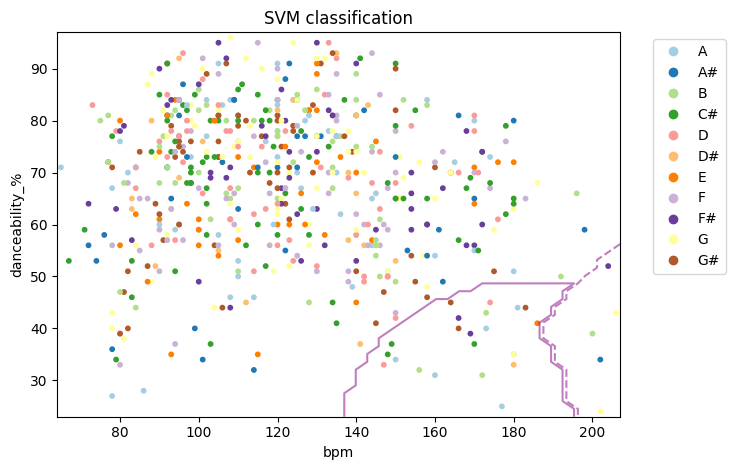

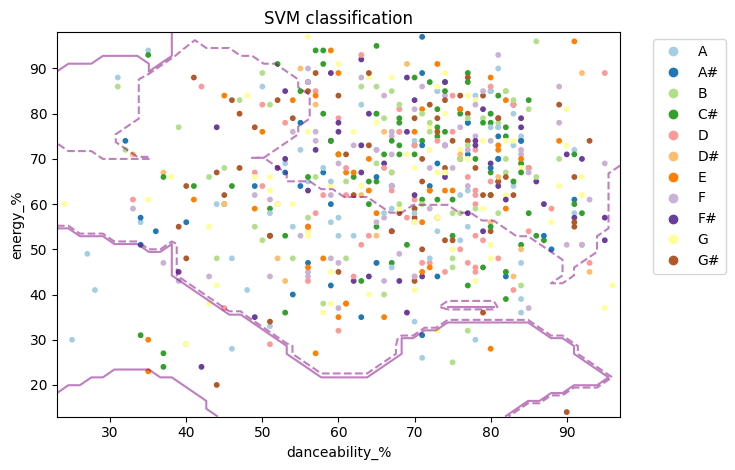

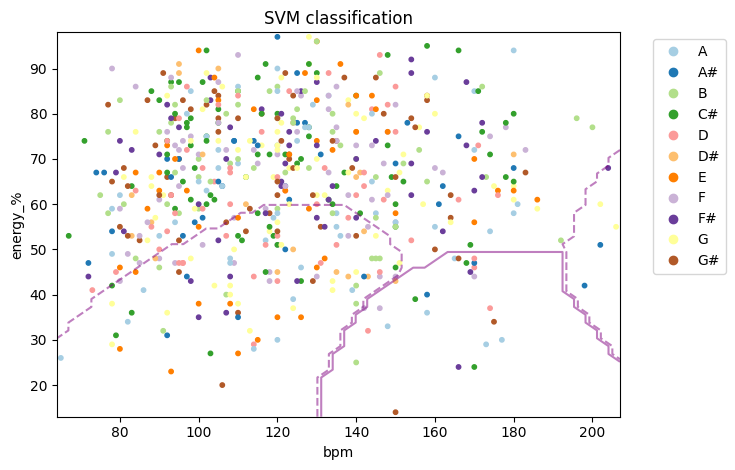

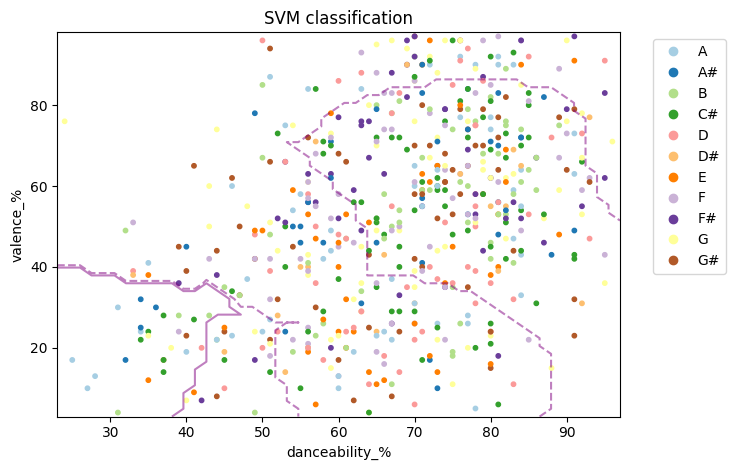

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay #Function to create graphs with support vectors
def SVMGraph(x, y):
      X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=30)
      SVM = svm.SVC(decision_function_shape='ovo')
      SVM.fit(X_train, y_train)
      decision_function = SVM.decision_function(X_train)
      """support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
      support_vectors = X_train.iloc[support_vector_indices]""" #Alternate way to get .support_vectors_
      sc = mat.scatter(X_train.iloc[:, 0], X_train.iloc[:,1], c=keysIndex, s=10, cmap=mat.cm.Paired)
      ax = mat.gca()
      handles, _ = sc.legend_elements(prop='colors', num=11)
      DecisionBoundaryDisplay.from_estimator(
          SVM,
          X_train,
          ax=ax,
          grid_resolution=50,
          plot_method="contour",
          colors="purple",
          levels=[-3, 0, 3],
          alpha=0.5,
          linestyles=["--", "-", "--"],
      )
      mat.scatter( #was supposed to highlight intersecting or close points with vector, ended up highlighting all points (uneccesary function)
          SVM.support_vectors_[:, 0],
          SVM.support_vectors_[:, 1],
          s=100,
          linewidth=1,
          facecolors="none",
          edgecolors="none",
      )
      mat.title("SVM classification")
      mat.tight_layout() #formulates graph better so axis labels are placed properly
      ax.legend(handles, ['A', 'A#', 'B', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'], loc = 'upper right', bbox_to_anchor=(1.2, 1)) #legend
      mat.show()

x = data[['bpm','danceability_%']]
y = stringkey
SVMGraph(x, y)
x = data[['danceability_%', 'energy_%']]
SVMGraph(x, y)
x = data[['bpm', 'energy_%']]
SVMGraph(x, y)
x = data[['danceability_%', 'valence_%']]
SVMGraph(x, y)

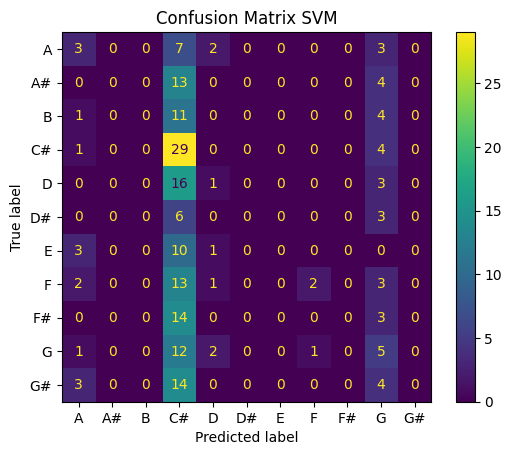

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['A', 'A#', 'B', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'])
cm_display.plot()
mat.title("Confusion Matrix SVM")
mat.show()